# Тема: Визуализация данных при помощи библиотек matplotlib  и seaborn

Библиотеки `matplotlib` и `seaborn` используются для проведения визуального анализа табличных данных.

`Matplotlib` самая известная (за счёт своего удобства) библиотека для построения графиков, которая доступна в Python и некоторых других языках программирования. 

На основе `matplotlib` создана новая библиотека, которая называется `seaborn`. `Seaborn` упрощает построение графиков, в сравнении с `matplotlib`, и позволяет сделать их визуально более привлекательными, а также привносит некоторые уникальные функции. Библиотека `Seaborn` оказывается хороша именно для анализа табличных данных.`Seaborn` следует рассматривать не как замену, а как дополнение к matplotlib. `Seaborn` — это библиотека для создания только статистических графиков на Python (в отличии от `matplotlib`).

Установка:

`pipenv install seaborn` 

### Загрузка данных 

In [1]:
import numpy as np
import pandas as pd

## Построение некоторых графиков

Необходимые библиотеки:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')

In [3]:
a = [0,2,8,2,9,2,3,5,6,7,3,3,2,3,4,5,6,7,8,9,9,9,8,8,5,6,8,4,3,2,1,4,4,5,7,3,2,1,0,9,0,9,7,6,5,4,3,6,0,1]
a = np.array([0,2,8,2,9,2,3,5,6,7,3,3,2,3,4,5,6,7,8,9,9,9,8,8,5,6,8,4,3,2,1,4,4,5,7,3,2,1,0,9,0,9,7,6,5,4,3,6,0,1])
a = pd.Series(np.array([0,2,8,2,9,2,3,5,6,7,3,3,2,3,4,5,6,7,8,9,9,9,8,8,5,6,8,4,3,2,1,4,4,5,7,3,2,1,0,9,0,9,7,6,5,4,3,6,0,1]))

b=pd.Series(np.array([3,5,7,1,0,5,7,1,6,0,2,6,9,5,2,3,4,5,9,9,9,1,2,7,3,6,8,0,0,4,3,1,7,0,5,9,4,3,5,8,4,1,1,4,7,2,2,2,1,5]))

In [4]:
dic = {
    "col1": a,
    "col2": b
}
df = pd.DataFrame(dic)
df.head()

,col1,col2
0,0,3
1,2,5
2,8,7
3,2,1
4,9,0


## 1. Линейный график (ломаная линия)

` plt.plot(x, y, color= , marker=, linewidth= , linestyle= , label=  и др.)`

`x, y` - данные

`color` - цвет ломаной линии

`marker` - выделение узлов ломаной

`linewidth` - толщина линии

`linestyle` - стиль линии, например 'solid'(-) ，'dashed' (--) ， 'dotted'(：) ，'dashdot'( -.)

`label` - подпись названия графика

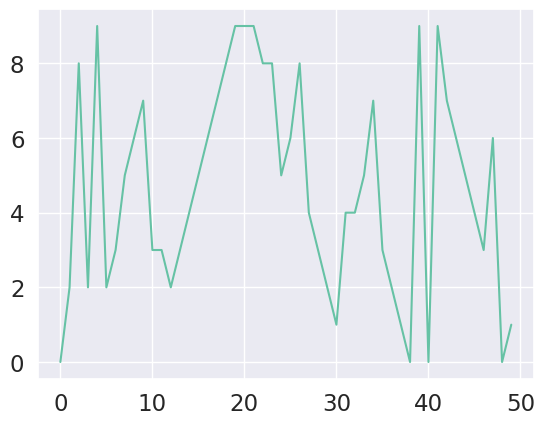

In [5]:
plt.plot(a) # график, где по горизонтали-индексы, а по вертикали - значения
plt.show()

Или в качестве аргумента можно передать не np.array, а столбец pd.DataFrame:

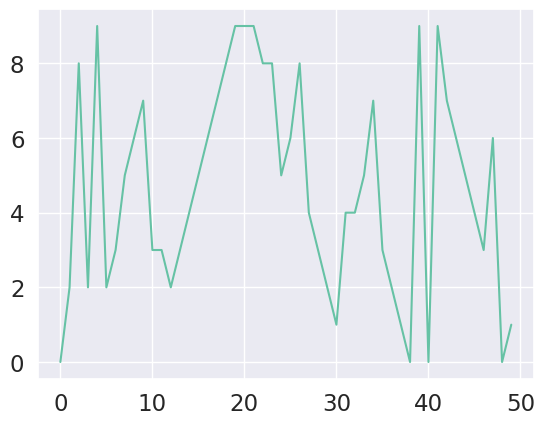

In [6]:
plt.plot(df['col1'])
plt.show()

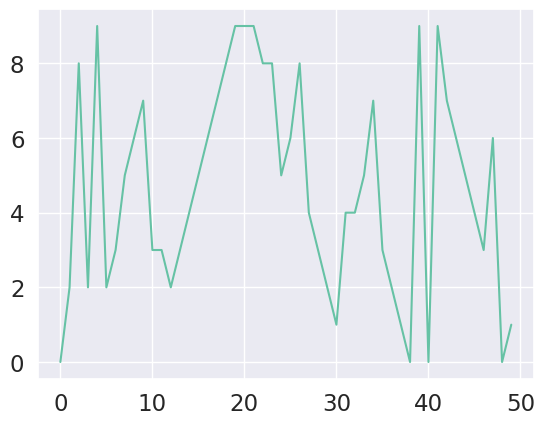

In [7]:
a.plot();

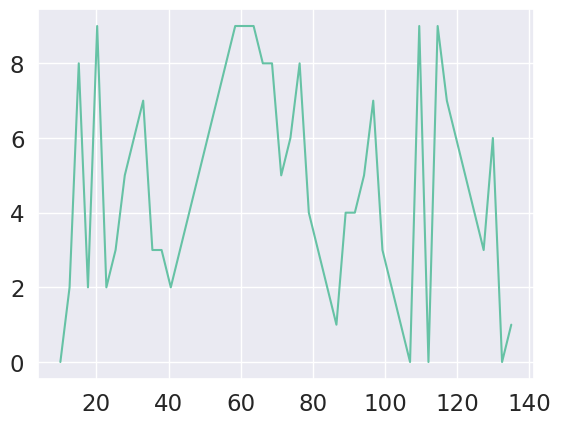

In [8]:
l = np.linspace(10, 135, 50)
plt.plot(l,a) 
plt.show()

Используем различные возможности `.plot()`:

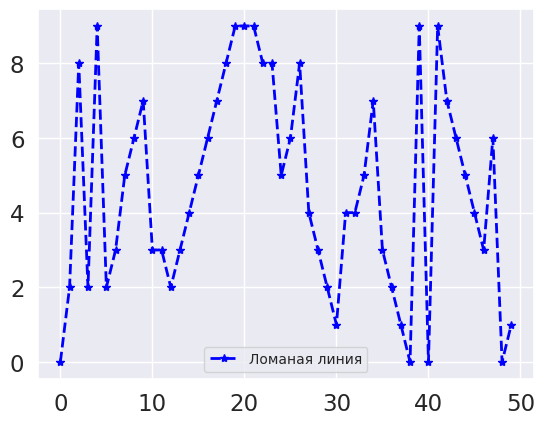

In [9]:
plt.plot(a,color='blue',linewidth=2,linestyle='dashed',marker='*',label='Ломаная линия')
plt.legend(fontsize=10) # показывать label
plt.show()

Зададим размер графика и добавим сетку, подписи осей и подпись графика:

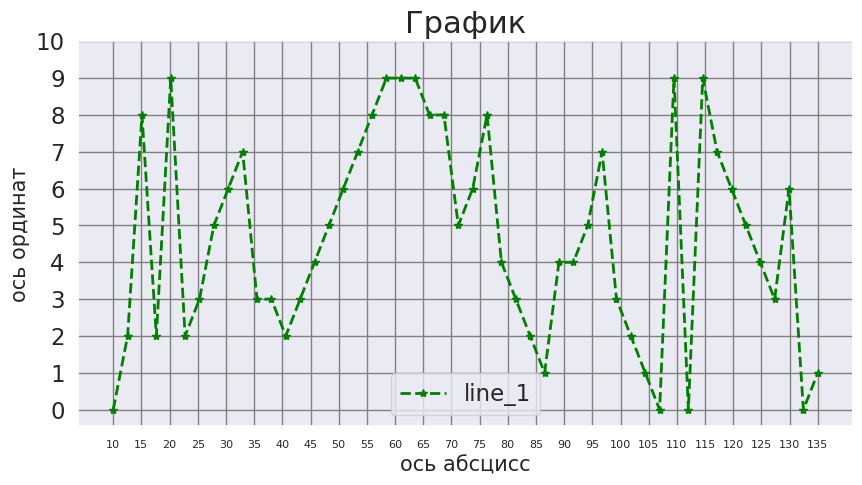

In [10]:
plt.figure(figsize=(10,5)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.plot(l, a, linewidth=2, color='green', marker='*', linestyle='dashed', label='line_1')
plt.legend() # показывать label
plt.grid(color='gray', linestyle='-', linewidth=1) # включить отрисовку сетки c определенными параметрами
axe_y = np.arange(0, a.max()+2)
axe_x=np.arange(10, 136, 5)
plt.yticks(axe_y) # можно явно указать, какие значения указывать на оси
plt.xticks(axe_x, fontsize=8)
plt.title("График", fontsize=22)
plt.xlabel('ось абсцисс', fontsize=15)
plt.ylabel('ось ординат', fontsize=15);

Тоже самое с seaborn:

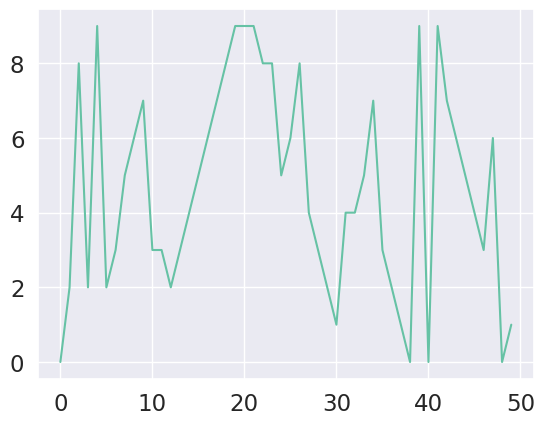

In [11]:
sns.lineplot(data=a)
plt.show()

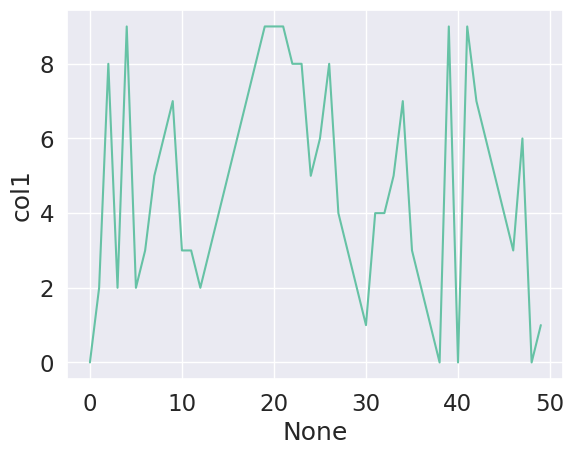

In [12]:
sns.lineplot(data=df, x=df.index, y='col1');

Стили в `staborn`

Установка эстетических параметров графиков:

`sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)`

* `context` &mdash; параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. Контекст: `notebook`, `paper`, `talk`, `poster`;
* `style` &mdash; стиль осей: `darkgrid` (серый фон с сеткой), `whitegrid` (белый фон с сеткой), `dark` (серый фон без сетки), `white`  (белый фон без сетки), `ticks`;
* `palette` &mdash; цветовая палитра: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, а так же палитры из `matplotlib`;
* `font` &mdash; шрифт текста;
* `font_scale` &mdash; масштабирование размера текста.

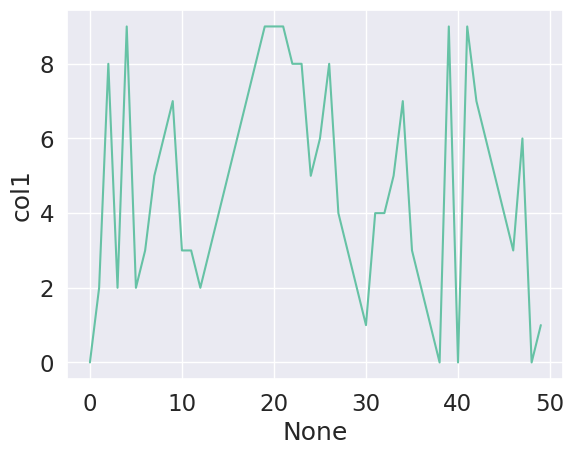

In [13]:
sns.set_style("darkgrid")#"whitegrid"
sns.lineplot(data=df, x=df.index, y='col1')
plt.show()

## 2. Диаграмма рассеяния (график, изображенный точками)

`plt.scatter`(`x`, `y`, `linewidth`= , `color`= , `marker`= , `alpha`=   и др.)

`x, y` - координаты точек

`linewidth` - жирность точек

`color` - цвет точек

`marker` - вид точек

`alpha` - прозрачность точек

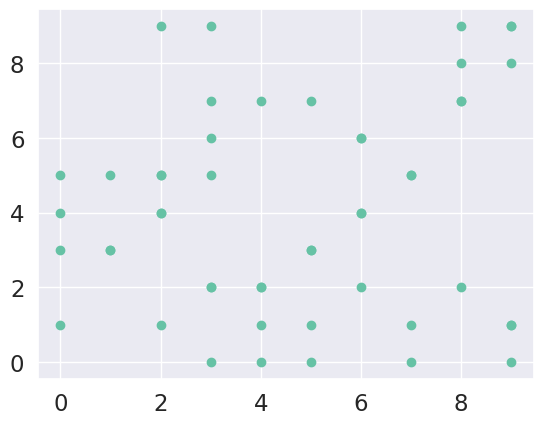

In [14]:
plt.scatter(df['col1'], df['col2']) # изображение точек с координатами из соответствующих столбцов
plt.show()

Или

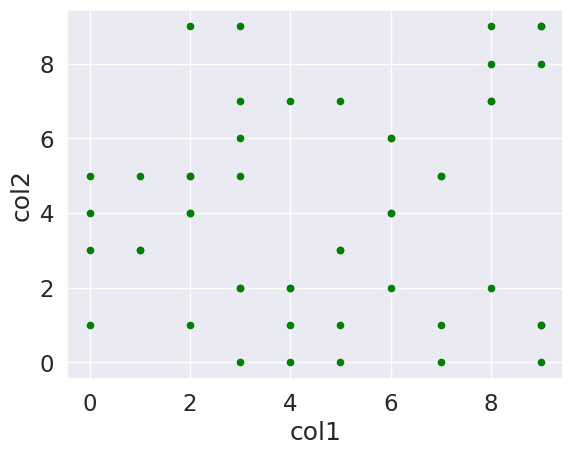

In [15]:
df.plot(kind='scatter', x='col1',y='col2',color='green');
plt.show()

Со всеми эффектами:

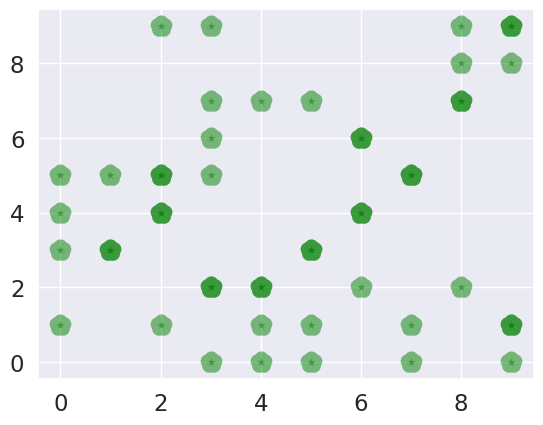

In [16]:
plt.scatter(df['col1'], df['col2'], linewidth=10, color='green', marker='*', alpha=0.5)
plt.show()

Тоже самое с seaborn:

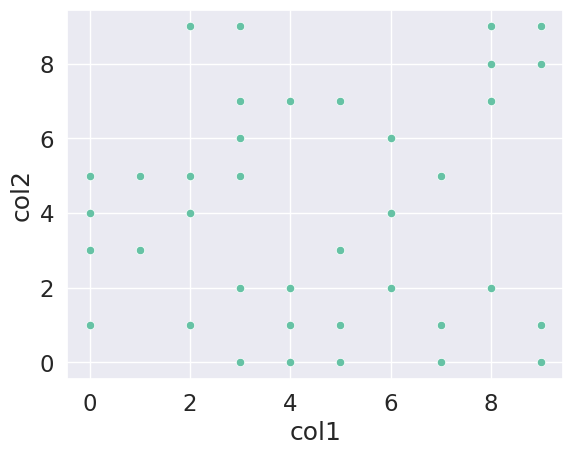

In [17]:
sns.scatterplot(data=df, x='col1', y='col2')
plt.show()

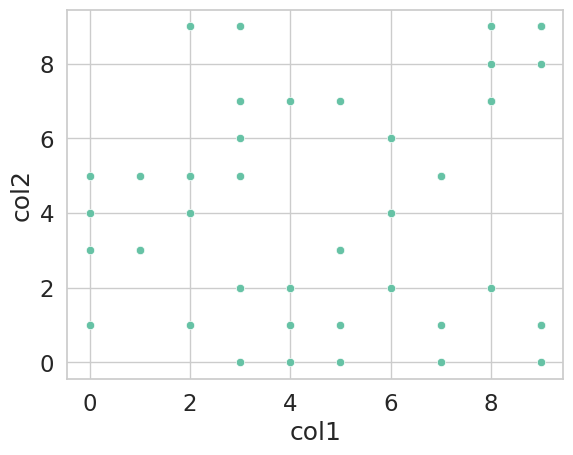

In [18]:
sns.set_style("whitegrid")#"darkgrid"
sns.scatterplot(data=df, x='col1', y='col2');
#plt.show()

## 3. Гистограмма (столбиковая диаграмма)

`plt.hist`(`x`, `color` = , ` bins`= , `density`= и др.)

`x`- данные

`color` - цвет столбиков

`bins` - количество столбиков / binwidth - ширина одного столбика

`density` - нормируем, так что сумма высот столбиков равна 1

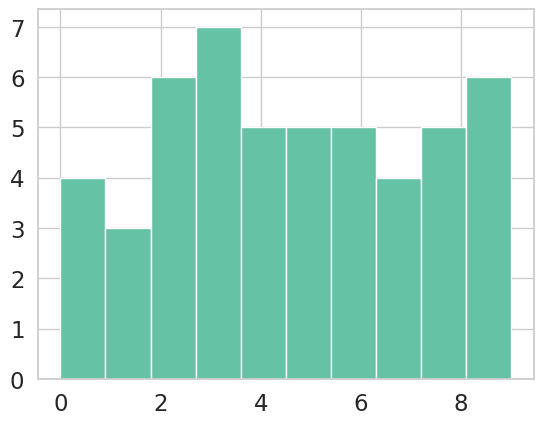

In [19]:
plt.hist(df['col1']) # bins - количество промежутков по оси x
plt.show()

Или 

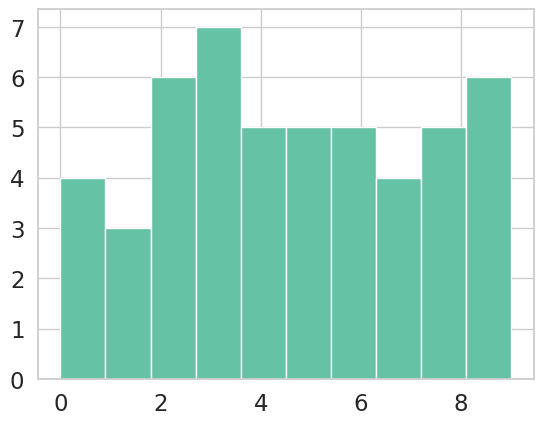

In [20]:
df['col1'].hist();

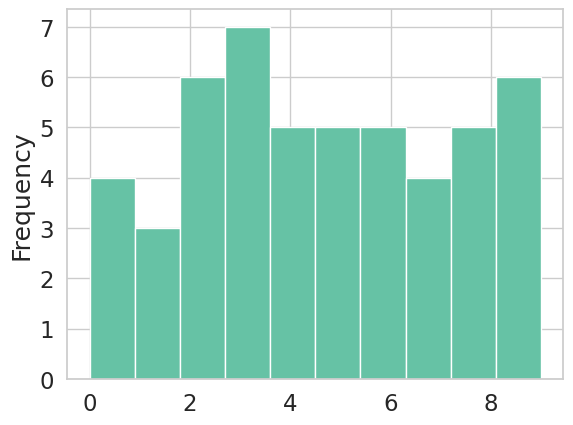

In [21]:
df['col1'].plot(kind='hist');

С использованием различных значений параметров:

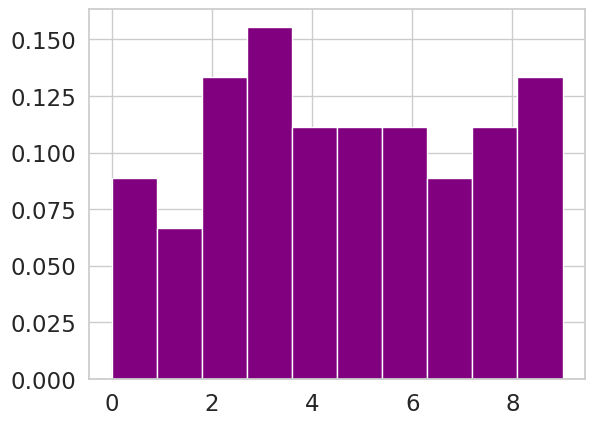

In [22]:
plt.hist(df['col1'], bins=10, color='purple',density=True) # bins - количество промежутков по оси x
plt.show()

Тоже самое с seaborn:

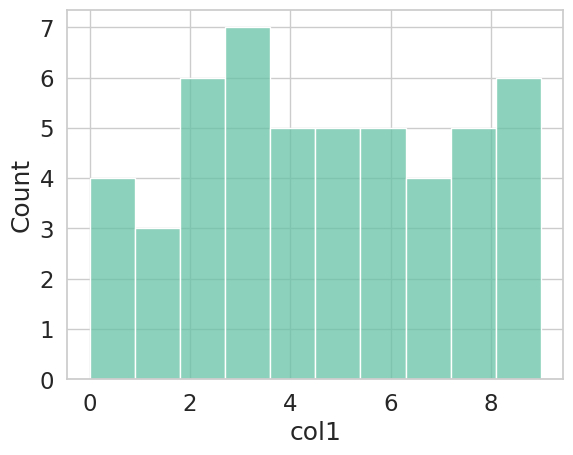

In [23]:
sns.histplot(df['col1'], bins=10);

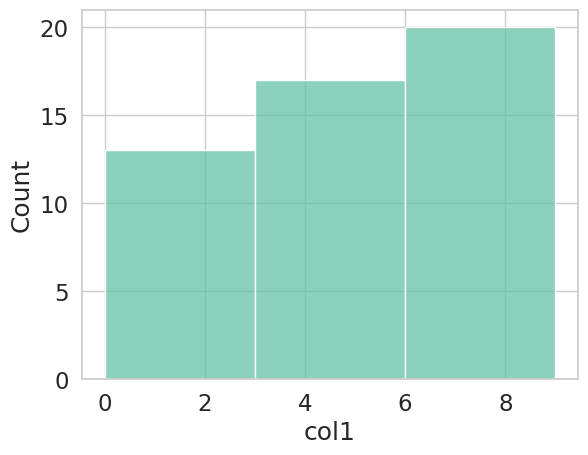

In [24]:
sns.histplot(df['col1'], binwidth=3);#binwidth - ширина столбика, а не количество столбиков!

## 4. Круговая диаграмма

`plt.pie`(`x`, `labels`= , `colors`= , `explode`= , `autopct`= , `startangle`= , `radius`=  и др.)

`x` - данные 

`labels` - подписи в виде ['a', 'b', 'c', 'd']

`colors` - цвета секторов, по умолчанию разные цвета

`explode` - сдвиг сектора от центра, например [0, 0, 0.1, 0], по умолчанию сдвиг равен 0

`autopct` - процентное значение секторов круговой диаграммы, процент целого числа («% d %%»), процент плавающей точки («% 1.2F %%»), строковый процент («% s %%»)

`startangle` - Начните угол рисования, по умолчанию от оси X в положительном направлении (против часовой стрелки)

`radius` - радиус круговой диаграммы, по умолчанию радиус 1

In [25]:
labels = ['Сектор 1',
          'Сектор 2',
          'Сектор 3',
          'Сектор 4']
 
values = np.array([51,16,9,24])

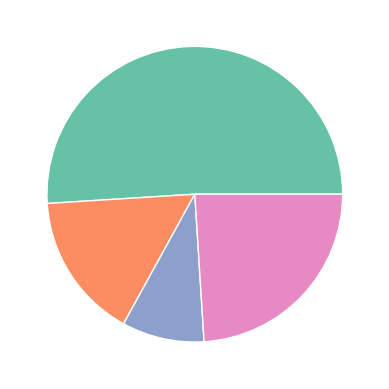

In [26]:
plt.pie(values)
plt.show()

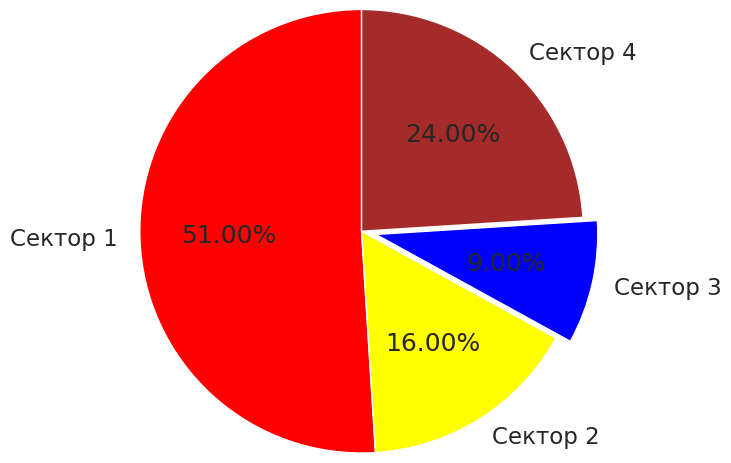

In [27]:
plt.pie(values,autopct='%1.2f%%',labels=labels,explode=[0, 0, 0.1, 0],startangle=90,radius=1.5,colors=['red','yellow','blue','brown'])
plt.show()

## 5. Boxplot (Ящик с усами) 

Box plot состоит из коробки, усиков и точек. 

Коробка показывает 25% (Q1) и 75% (Q3) перцентили.

Черта внутри коробки обозначает медиану распределения.

Усы отображают минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5IQR, Q3 + 1.5IQR), где IQR = Q3 - Q1.

Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

`seaborn.boxplot(x=, y=, hue=, data=, orient=, color=, palette=)`

* `data` &mdash; таблица
* `x`, `y` &mdash; названия столбцов из `data`
* `orient`: `"v"` | `"h"` &mdash; ориентация (вертикальная или горизонтальая)
* `color` и `palette` &mdash; задают цвет

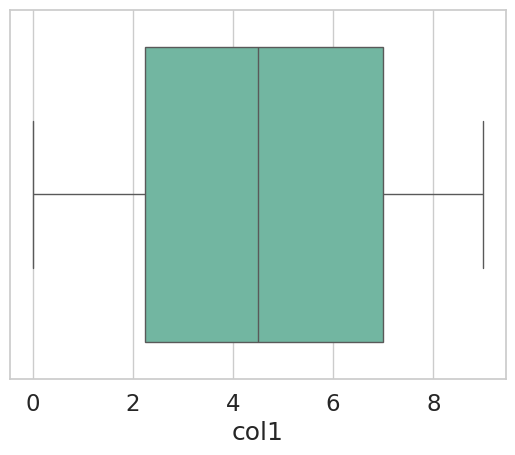

In [28]:
sns.boxplot(x='col1', data=df);

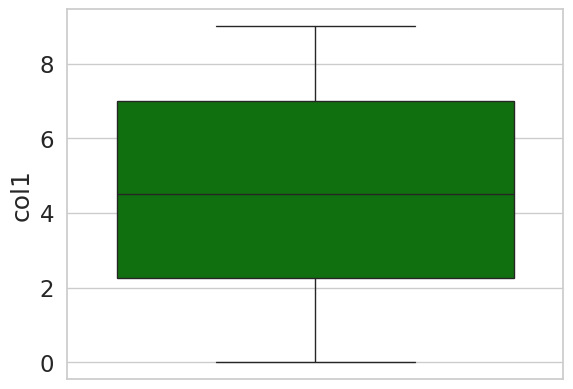

In [29]:
sns.boxplot(y='col1', data=df, orient="v", color='green');#чтобы ориентация изменилась, данные подаём в y

/tmp/ipykernel_9780/3305525945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='col1',y='col2', data=df, palette='Set1');


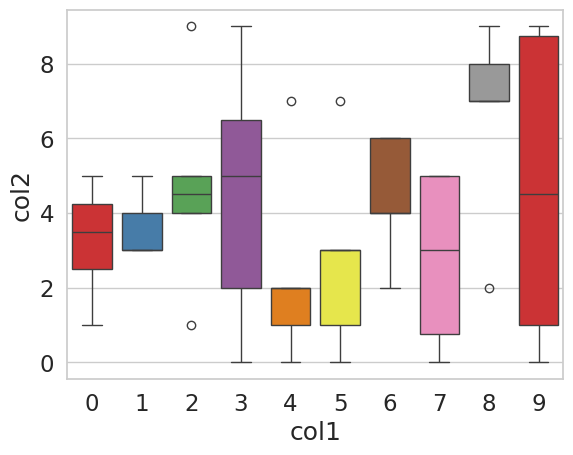

In [30]:
sns.boxplot(x='col1',y='col2', data=df, palette='Set1');

## 6. График плотности распределения данных (ядерная оценка плотности)

`sns.kdeplot`( `data`=, `lw`=, `label`= ,`shade`= ,`cmap`= и др.)

 `data` - данные
 
 `lw` - толщина линии
 
 `label` - подпись
 
 `shade`- закрашивать ли область под кривой
 
 `cmap` - тип цветовой палитры в Matplotlib Colormap

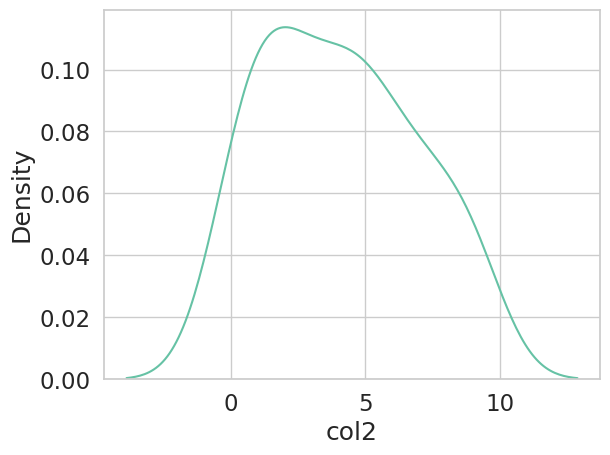

In [31]:
sns.kdeplot(df['col2'])
plt.show()


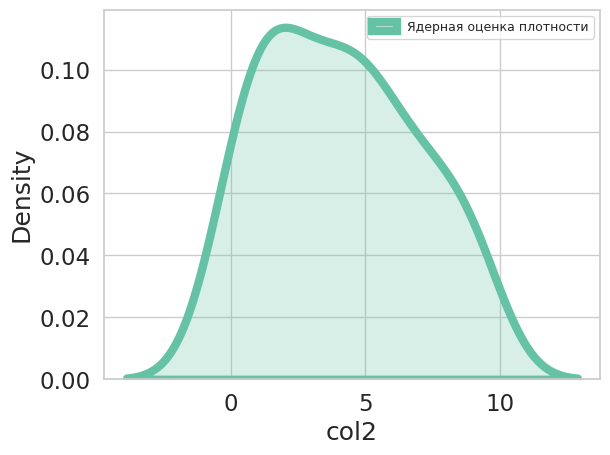

In [32]:
sns.kdeplot(data=df['col2'], lw=6, label="Ядерная оценка плотности",fill=True)
plt.legend(fontsize=9)
plt.show()


Построим двумерную ядерную оценку плотности:

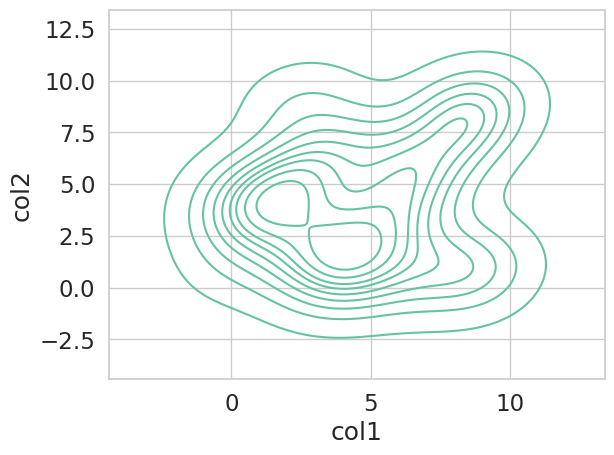

In [33]:
sns.kdeplot(x=df['col1'],y=df['col2'])
plt.show()

## 7. График displot (на одном графике плотность и гистограмма)

`sns.displot(a, bins=, hist=, kde=, rug= , color= , vertical=, norm_hist=)`

* `a` &mdash; выборка;
* `bins` &mdash; число бинов гистограммы
* `hist` &mdash; рисовать ли гистограмму True или False
* `kde` &mdash; рисовать ли kde True или False
* `rug` &mdash; рисовать ли точки выборки в виде штрихов True или False
* `color` &mdash; цвет
* `vertical` &mdash; повернуть график True или False
* `norm_hist` &mdash; нормировать ли гистограмму True или False

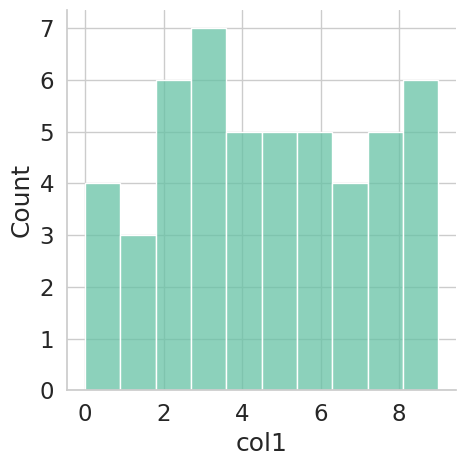

In [34]:
sns.displot(df['col1'],bins=10);

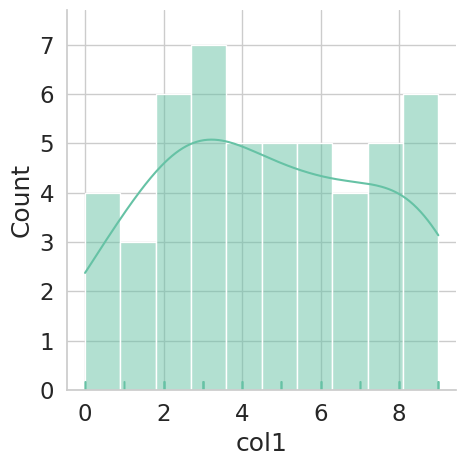

In [35]:
sns.displot(df['col1'],kde=True, bins=10, rug=True);

## 8. Тепловая карта

`sns.heatmap(data, annot=, fmt=, cmap=, vmin= , vmax= , center=, linewidths= , linecolor= ,cbar= , square= , xticklabels= , yticklabels=  и др.)`

* `data` &mdash; данные
* `annot` &mdash; указывать ли числовые значения True или False (по умолчанию False)
* `fmt` &mdash; сколько знаков выводить после запятой, например: '.1g' или '.2g' или '.3g' (по умолчанию '.2g')
* `cmap` &mdash; цветовая шкала: 'hot','coolwarm','cool','spring' и др.
* `vmin` &mdash; минимальное значение цветовой шкалы
* `vmax` &mdash; максимальное значение цветовой шкалы
* `center` &mdash; центр цветовой шкалы
* `linewidths` &mdash; толщина границ ячеек
* `linecolor` &mdash; цвет границ ячеек
* `cbar` &mdash; отображать или нет цветовую шкалу True или False (по умолчанию True)
* `square` &mdash; сделать ячейки квадратной формы True или False (по умолчанию прямоугольные, т.е. False )
* `xticklabels` &mdash; подпись названий ячеек горизонтали 'auto' или указать свои
* `yticklabels` &mdash; подпись названий ячеек повертикали 'auto' или указать свои

Создадим таблицу данных:

In [36]:
dic = {
    "col1": [-1, 2, 3, 4],
    "col2": [5, 6, 0, 7],
    "col3": [1, 2, -3, -2],
    "col4": [8, 9, 0, 0]
}
tabl = pd.DataFrame(dic)

Построим для неё тепловую карту:

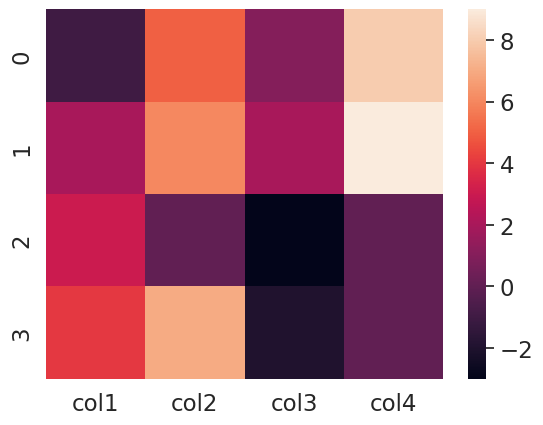

In [37]:
sns.heatmap(tabl);

Построим ту же тепловую карту, используя различные аргументы:

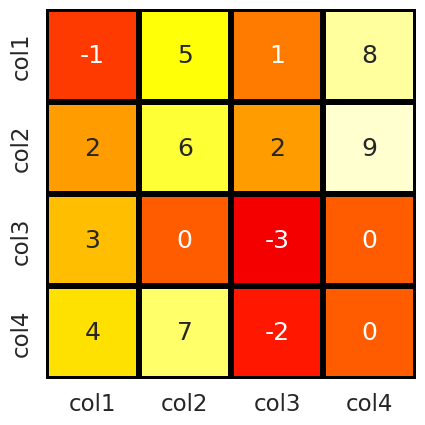

In [38]:
sns.heatmap(tabl, annot=True, fmt='.1g', cmap= 'hot', vmin= -10, vmax= 10, center=0, linewidths=4, linecolor= 'black',cbar= False, square= True, xticklabels= tabl.columns, yticklabels= tabl.columns);

## Изображение нескольких видов графиков на одной области

In [39]:
dataset = pd.DataFrame({
    "col1": np.random.rand(100),
    "col2": np.random.normal(size=100),
    "col3": np.random.rand(100),
    "col4": np.random.normal(size=100)
})
dataset.head()

,col1,col2,col3,col4
0,0.780691,0.949257,0.892174,-0.122399
1,0.321724,2.284428,0.308892,1.575321
2,0.238526,-0.353482,0.053194,2.762379
3,0.338010,-1.147205,0.824403,-0.741281
4,0.669666,1.793235,0.156308,-0.093667


Figure - это область, на которой изображаются графики (контейнер самого верхнего уровня).
Создадим экземпляр класса figure:

In [40]:
f=plt.figure(figsize=(10,12))
plt.show()

<Figure size 1000x1200 with 0 Axes>

## 1. Subplots

Разобьём область Figure на подобласти, внутри каждой из которых, можно построить свои оси координат (Axis) для графика:

`plt.figure().subplots`(`nrows`, `ncols`) 

* `nrows`&mdash; число строк
* `ncols`&mdash; число столбцов

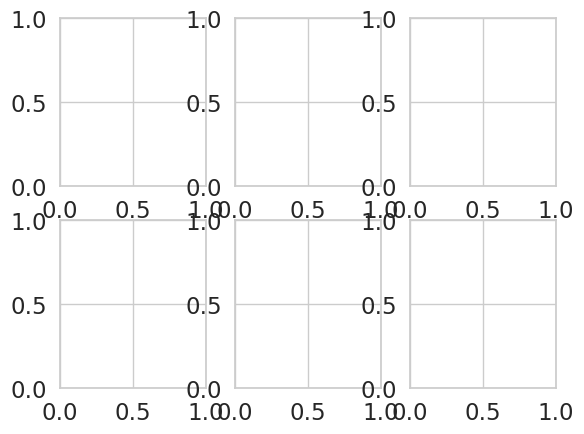

In [41]:
f=plt.figure()
ax=f.subplots(2,3) 
plt.show()

Доступ к нужной системе координат получаем так: ` axis[i,j]`

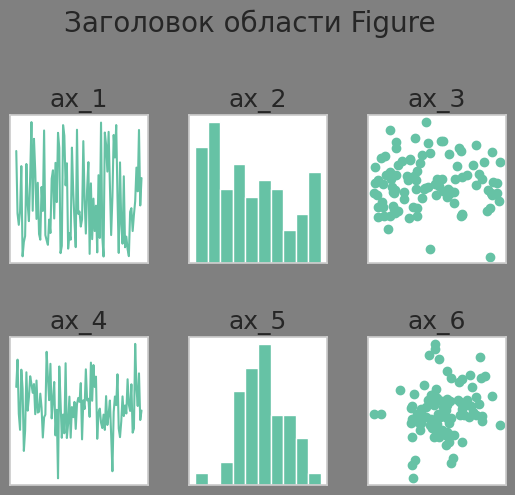

In [42]:
f=plt.figure()# создание области
ax=f.subplots(2,3)# создание систем координат в этой области 

#fig, ax = plt.subplots(2,3,figsize=(14,4)) #можно сразу создать область и оси

ax[0,0].plot(dataset['col1'])
ax[0,1].hist(dataset['col1'])
ax[0,2].scatter(dataset['col1'], dataset['col2'])
ax[1,0].plot(dataset['col2'])
ax[1,1].hist(dataset['col2'])
ax[1,2].scatter(dataset['col2'], dataset['col4'])

f.set(facecolor = 'grey')
f.subplots_adjust(hspace=0.5,wspace=0.3)# можно задать расстояние между строками и столбцами соответственно

ax[0,0].set(title = 'ax_1', xticks=[], yticks=[])
ax[0,1].set(title = 'ax_2', xticks=[], yticks=[])
ax[0,2].set(title = 'ax_3', xticks=[], yticks=[])
ax[1,0].set(title = 'ax_4', xticks=[], yticks=[])
ax[1,1].set(title = 'ax_5', xticks=[], yticks=[])
ax[1,2].set(title = 'ax_6', xticks=[], yticks=[])
plt.suptitle('Заголовок области Figure',y = 1.1,fontsize=20)
plt.show()

Можно вывести один тип графиков для разных признаков:

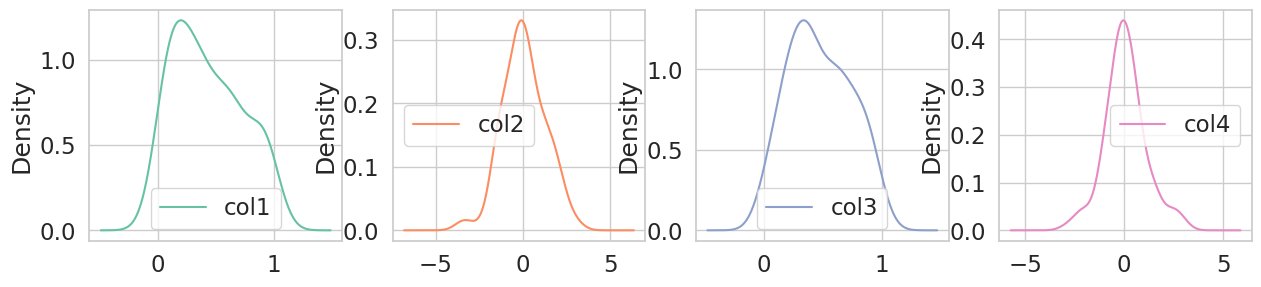

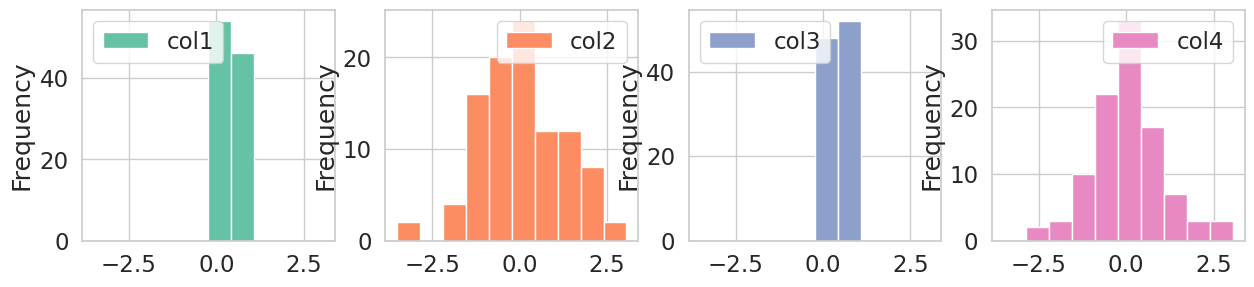

In [43]:
dataset.plot(kind='kde', subplots=True, layout=(1, 4), sharex=False, figsize=(15, 3));
dataset.plot(kind='hist', subplots=True, layout=(1, 4), sharex=False, figsize=(15, 3));

## 2. PairGrid

Сетка графиков для визуализации попарных отношений в данных.
 
`sns.PairGrid`(`data`, `hue`= , `palette`= , `height`=   и др.)

* `data` &mdash; данные;
* `hue` &mdash; категории, которые будут закрашиваться в разные цвета;
* `palette` &mdash; цветовая схема, может быть задана в виде словаря цветов;
* `height` &mdash; высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. 
В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных 
(или по одной на диагонали), а так же параметры этой функции.

* `map(func, ...)` &mdash; для каждой клетки применить `func`;
* `map_diag(func, ...)` &mdash; для каждой клетки *на диагонали* применить `func`;
* `map_offdiag(func, ...)` &mdash; для каждой клетки *вне диагонали* применить `func`;
* `map_lower(func, ...)` &mdash; для каждой клетки *под диагональю* применить `func`;
* `map_upper(func, ...)` &mdash; для каждой клетки *над диагональю* применить `func`.

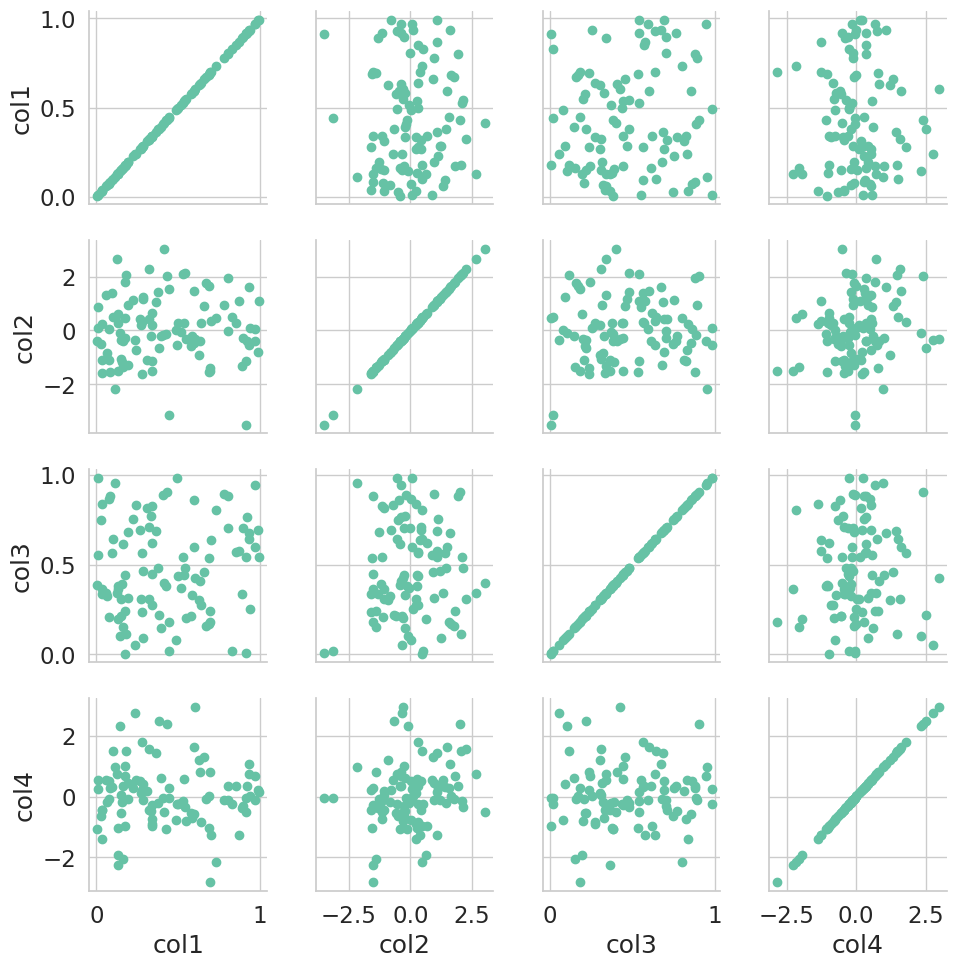

In [44]:
g = sns.PairGrid(dataset)
g.map(plt.scatter);

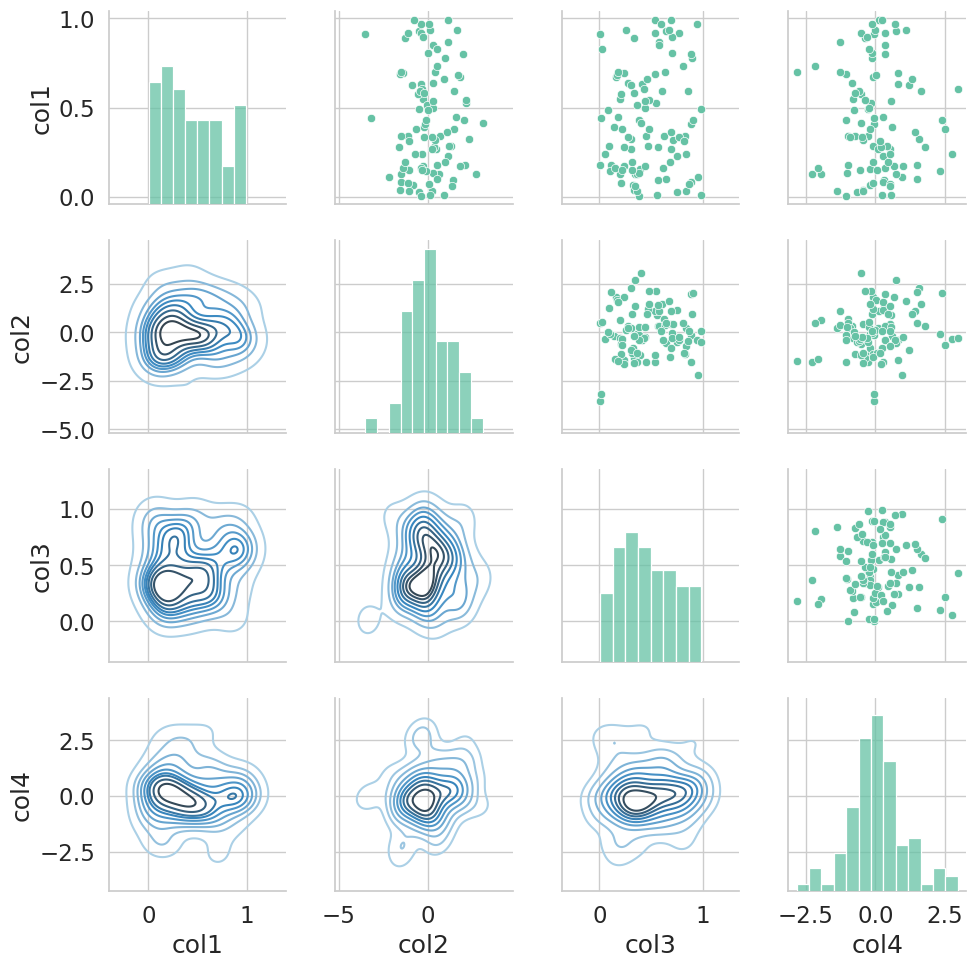

In [45]:
g = sns.PairGrid(dataset)
g.map_lower(sns.kdeplot, cmap='Blues_d')# под диагональю
g.map_upper(sns.scatterplot)#  над диагональю
g.map_diag(sns.histplot); # на диагонали